In [11]:
from scipy.stats import chi2 as chisquare
import numpy as np
import matplotlib.pyplot as plt
from math import log, gamma

In [3]:
x = np.linspace(0, 10, 100)
df = 4

In [23]:
def _chisquare_logpdf(x, df, loc=0, scale=1):
    y = (x - loc)/scale
    keys = y < 0
    y[keys] = 0.1 # placeholder value, will actually return -np.inf
    
    ans = - log(2**(df/2.)*gamma(df/2.))
    ans = ans + (df/2. - 1.) * np.log(y) - y/2. - log(scale)
    
    ans[keys] = -np.inf
    
    return ans

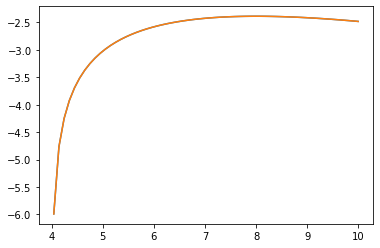

In [24]:
loc=4
scale=2

my_chisq = _chisquare_logpdf(x, df, loc=loc, scale=scale)
scipy_chisq = chisquare.logpdf(x, df, loc=loc, scale=scale)

plt.plot(x, scipy_chisq)
plt.plot(x, my_chisq)

In [26]:
x = np.linspace(0.01, 10, int(1E7))

In [27]:
%%timeit
chisquare.logpdf(x, df)

632 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
_chisquare_logpdf(x, df)

132 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
log(2)

85.5 ns ± 4.28 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [30]:
%%timeit
np.log(2)

853 ns ± 12.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [31]:
import cProfile

In [33]:
cProfile.run("_chisquare_logpdf(x, df)")

         7 function calls in 0.146 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.138    0.138    0.138    0.138 <ipython-input-23-ecf3a8501901>:1(_chisquare_logpdf)
        1    0.008    0.008    0.146    0.146 <string>:1(<module>)
        1    0.000    0.000    0.146    0.146 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method math.gamma}
        2    0.000    0.000    0.000    0.000 {built-in method math.log}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [34]:
%%timeit
np.log(x)

51.3 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
